# 4.2 Assignment: Clustering Exercise

## DSC 630: Predictive Analytics

## June 30th, 2024

## Kenn Wade

# Introduction

## Overview

The objective is to analyze and visualize a dataset on ALS patients using clustering methods. The dataset "als_data.csv" provides anonymized data on ALS patients, which will be used to explore clustering patterns.

## Dataset Description

The "als_data.csv" dataset includes various metrics related to ALS patients, such as age and ALS Functional Rating Scale (ALSFRS) scores. Key columns include:
1. `Age_mean`
2. `ALSFRS_slope`
3. `ALSFRS_Total_max`
4. `ALSFRS_Total_median`
5. `ALSFRS_Total_min`

## Assignment Instructions

For this assignment, I will:
1. **Data Cleaning**: Remove irrelevant data.
2. **Data Scaling**: Normalize the data.
3. **Clustering Analysis**: Determine optimal clusters and fit a K-means model.
4. **PCA Transformation**: Apply PCA for visualization.
5. **Visualization**: Create scatterplots of the clusters.
6. **Summary and Conclusion**: Summarize findings and conclusions.

## Questions to Explore

I will explore the following questions:
1. How many distinct clusters can be identified?
2. What are the characteristics of these clusters in terms of ALS progression?

This analysis will provide insights into ALS patient data and identify patterns that can inform future research.

In [1]:
import pandas as pd

# Step 1: Load the dataset
print("Step 1: Loading the dataset...")
data = pd.read_csv('/Users/kennwade/Downloads/als_data.csv')

# Display the first few rows of the dataset
print("Displaying the first few rows of the dataset:")
print(data.head())

Step 1: Loading the dataset...
Displaying the first few rows of the dataset:
   ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0   1        65         57.0            40.5         38.0       0.066202   
1   2        48         45.0            41.0         39.0       0.010453   
2   3        38         50.0            47.0         45.0       0.008929   
3   4        63         47.0            44.0         41.0       0.012111   
4   5        63         47.0            45.5         42.0       0.008292   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  ...  \
0     -0.965608                30                 28.0                22  ...   
1     -0.921717                37                 33.0                21  ...   
2     -0.914787                24                 14.0                10  ...   
3     -0.598361                30                 29.0                24  ...   
4     -0.444039                32                 27.5       

In [2]:
# Check the columns and their data types
print("Checking the columns and their data types:")
print(data.info())

# Display the column names to identify relevant ones
print("Listing all columns in the dataset:")
print(data.columns.tolist())

Checking the columns and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB
None
Listing all columns in the dataset:
['ID', 'Age_mean', 'Albumin_max', 'Albumin_median', 'Albumin_min', 'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_max', 'ALSFRS_Total_median', 'ALSFRS_Total_min', 'ALSFRS_Total_range', 'ALT.SGPT._max', 'ALT.SGPT._median', 'ALT.SGPT._min', 'ALT.SGPT._range', 'AST.SGOT._max', 'AST.SGOT._median', 'AST.SGOT._min', 'AST.SGOT._range', 'Bicarbonate_max', 'Bicarbonate_median', 'Bicarbonate_min', 'Bicarbonate_range', 'Blood.Urea.Nitrogen..BUN._max', 'Blood.Urea.Nitrogen..BUN._median', 'Blood.Urea.Nitrogen..BUN._min', 'Blood.Urea.Nitrogen..BUN._range', 'bp_diastolic_max', 'bp_diastolic_median', 'bp_diastolic_min', 'bp_diastolic_range', 'bp_systolic_max', 'bp_systolic_median', 'bp_systolic_min', 'bp_systolic_range', 'Calcium_max', 'Calcium_median', '

In [3]:
# Step 2: Remove irrelevant data
print("Step 2: Removing irrelevant columns...")

# Relevant columns related to ALS condition
relevant_columns = ['Age_mean', 'ALSFRS_slope', 'ALSFRS_Total_max', 'ALSFRS_Total_median', 'ALSFRS_Total_min']

# Selecting relevant data
relevant_data = data[relevant_columns]

# Display the first few rows of the relevant data
print("Displaying the first few rows of the relevant data:")
print(relevant_data.head())

Step 2: Removing irrelevant columns...
Displaying the first few rows of the relevant data:
   Age_mean  ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  \
0        65     -0.965608                30                 28.0   
1        48     -0.921717                37                 33.0   
2        38     -0.914787                24                 14.0   
3        63     -0.598361                30                 29.0   
4        63     -0.444039                32                 27.5   

   ALSFRS_Total_min  
0                22  
1                21  
2                10  
3                24  
4                20  


In [4]:
from sklearn.preprocessing import StandardScaler

# Step 3: Apply a standard scalar to the data
print("Step 3: Applying StandardScaler to the data...")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(relevant_data)

# Display the scaled data
print("Displaying the scaled data (first few rows):")
print(scaled_data[:5])

Step 3: Applying StandardScaler to the data...
Displaying the scaled data (first few rows):
[[ 0.91713698 -0.38145034 -0.31852012  0.13495988  0.2473679 ]
 [-0.57487867 -0.31090704  0.99899492  0.88886316  0.13083922]
 [-1.45253494 -0.29976862 -1.44781873 -1.97596931 -1.15097626]
 [ 0.74160573  0.20880052 -0.31852012  0.28574053  0.48042526]
 [ 0.74160573  0.45683068  0.05791275  0.05956955  0.01431054]]


Step 4: Calculating silhouette scores for different numbers of clusters...
Plotting silhouette scores vs. number of clusters...


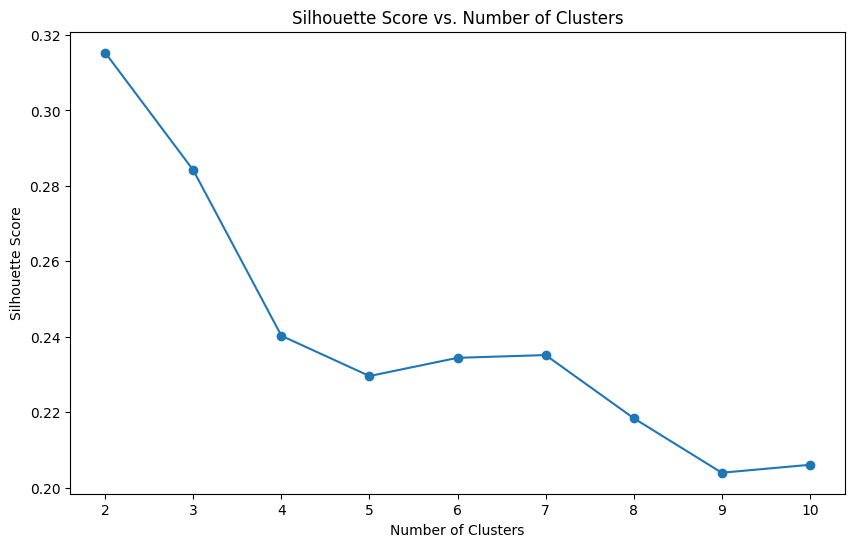

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 4: Create a plot of the cluster silhouette score versus the number of clusters in K-means
print("Step 4: Calculating silhouette scores for different numbers of clusters...")
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
print("Plotting silhouette scores vs. number of clusters...")
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [6]:
# Step 5: Choose the optimal number of clusters based on the plot
optimal_clusters = 2
print(f"Step 5: Choosing the optimal number of clusters: {optimal_clusters}")

Step 5: Choosing the optimal number of clusters: 2


In [7]:
from sklearn.cluster import KMeans

# Step 6: Fit a K-means model to the data with the optimal number of clusters
print("Step 6: Fitting K-means model with the optimal number of clusters...")
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_data)

# Display cluster centers and labels
print("Cluster centers:")
print(kmeans.cluster_centers_)
print("Cluster labels:")
print(kmeans.labels_)

Step 6: Fitting K-means model with the optimal number of clusters...
Cluster centers:
[[ 0.08332553  0.43719516  0.62468051  0.7226128   0.76039676]
 [-0.09011329 -0.47280938 -0.6755674  -0.78147733 -0.82233919]]
Cluster labels:
[0 0 1 ... 1 0 1]


In [8]:
from sklearn.decomposition import PCA

# Step 7: Fit a PCA transformation with two features to the scaled data
print("Step 7: Applying PCA transformation...")
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Display PCA transformed data
print("Displaying PCA transformed data (first few rows):")
print(pca_data[:5])

Step 7: Applying PCA transformation...
Displaying PCA transformed data (first few rows):
[[ 0.01565021  0.4973427 ]
 [-0.97748296  0.57857971]
 [ 2.68037608 -1.10139416]
 [-0.36880461 -0.04253046]
 [-0.23980666 -0.02413078]]


Step 8: Creating a scatter plot of the PCA transformed data...


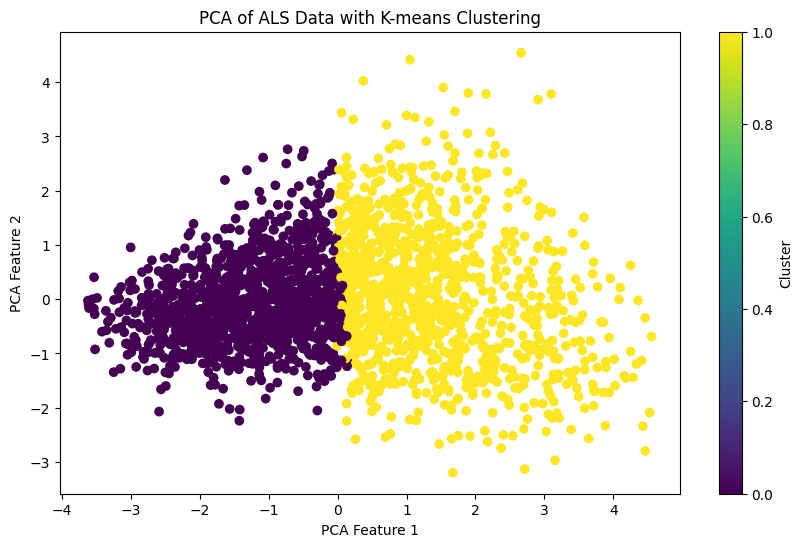

In [9]:
import matplotlib.pyplot as plt

# Step 8: Make a scatterplot of the PCA transformed data coloring each point by its cluster value
print("Step 8: Creating a scatter plot of the PCA transformed data...")
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('PCA of ALS Data with K-means Clustering')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [11]:
# Step 9: Summarize results
print("Step 9: Summary of results:")
print(f"Optimal number of clusters chosen: {optimal_clusters}")
print("Silhouette scores for different clusters: ", silhouette_scores)
print("The PCA plot shows the clustering of the ALS data into distinct groups.")

Step 9: Summary of results:
Optimal number of clusters chosen: 2
Silhouette scores for different clusters:  [0.3152858344510372, 0.28414193478657074, 0.24029528348419157, 0.2296216544489119, 0.2344490788744648, 0.23518003446506527, 0.21845910341419275, 0.2040073189036657, 0.2061030407736057]
The PCA plot shows the clustering of the ALS data into distinct groups.


### Conclusion

The K-means clustering with PCA visualization helps in identifying distinct clusters within the ALS data. The optimal number of clusters chosen was 2, based on the highest silhouette score of approximately 0.32. The PCA plot effectively shows the clustering of the ALS data into two distinct groups. This clustering could potentially be used for further analysis in understanding different patient groups, which may lead to insights on the progression and treatment of ALS.